# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


In [1]:
# Data processing & modeling
import pandas as pd  # For data manipulation and wrangling
from sklearn.model_selection import train_test_split  # For sampling data into training and test sets
import tensorflow as tf  # For neural network and model architecture
from tensorflow import keras  # For building and training neural networks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Model evaluation
from sklearn import metrics  # For model evaluation metrics (similar to caret in R)



In [2]:
#Loading the dataset

test = pd.read_csv("C:/Users/Beatrice/Downloads/Assignment3_UMLT_2024/Assignment3_UMLT_2024/sign_mnist_test.csv")
train = pd.read_csv("C:/Users/Beatrice/Downloads/Assignment3_UMLT_2024/Assignment3_UMLT_2024/sign_mnist_train.csv")

In [3]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,157,157,157,157,157,158,158,...,149,163,175,175,175,175,175,149,149,149
2,2,187,188,188,188,188,188,188,188,188,...,202,201,200,199,199,199,198,195,195,195
3,2,211,211,212,212,212,212,212,212,211,...,235,234,233,231,230,229,229,229,229,163
4,13,164,167,170,172,176,179,180,184,185,...,133,163,163,163,164,179,179,179,179,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,238,255,255,255,255,255,255
6,8,134,134,135,135,136,137,137,138,138,...,138,189,189,189,189,189,181,181,181,179
7,22,114,114,114,114,114,109,117,127,142,...,223,225,227,227,228,228,228,228,228,228
8,3,169,174,176,180,183,185,187,188,190,...,123,123,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,191,191,191,...,204,204,204,204,201,201,193,178,178,156


In [4]:
class_names = ['A','B','C','D','E','F','G',
               'H','I','K','L','M','N',
               'O','P','Q','R','S','T','U',
               'V','W','X','Y']

<Axes: xlabel='label', ylabel='count'>

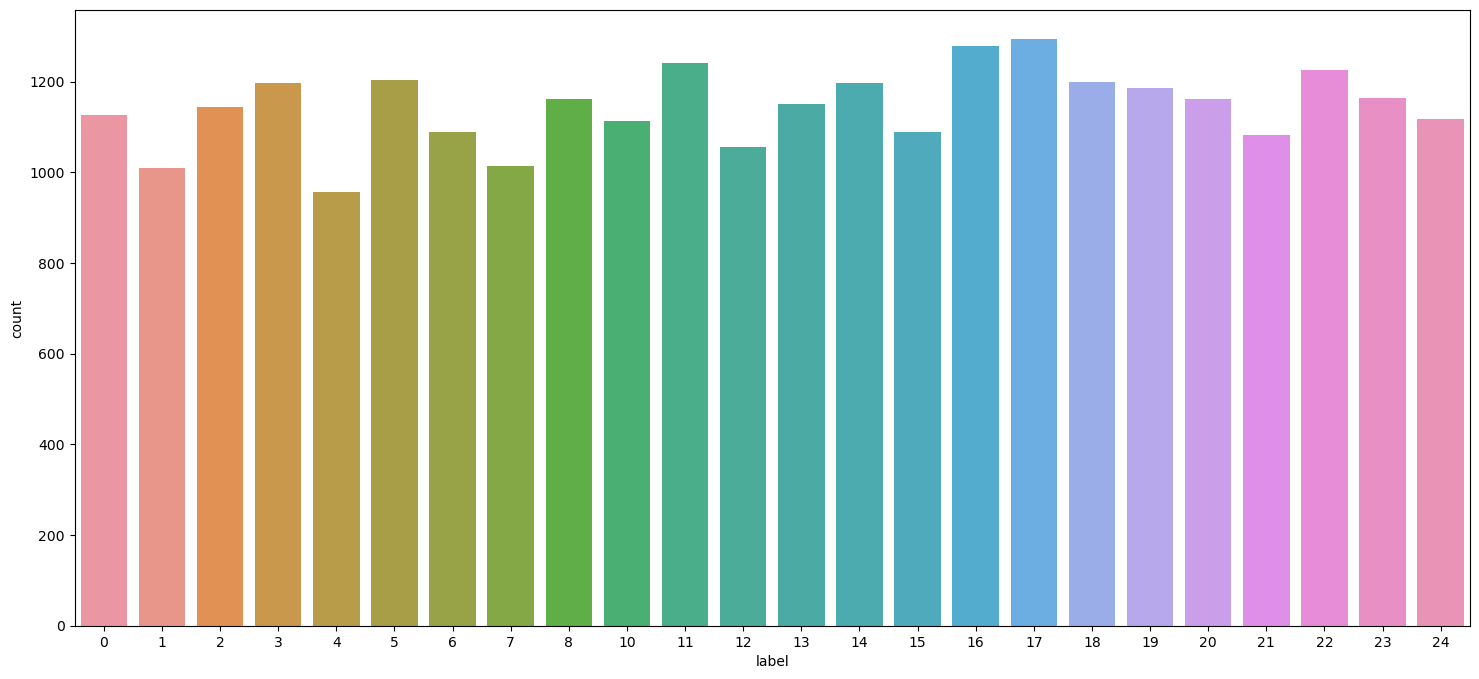

In [5]:
#Data Exploration

plt.figure(figsize = (18,8))
sns.countplot(x=train['label'])

In [6]:
np.sort(train['label'].unique())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [7]:
np.sort(test['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [8]:
#Preprocessing label to include 9

def preprocessing_label(label):
    if label > 8:
        label = label - 1
    return label

train['label'] = train['label'].map(preprocessing_label)
test['label'] = test['label'].map(preprocessing_label)

In [9]:
np.sort(train['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [10]:
np.sort(test['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [11]:
train_labels = train['label'].values
test_labels = test['label'].values

train.drop('label', axis = 1, inplace = True)
test.drop('label', axis=1, inplace = True)

In [12]:
# Preprocessing and reshape images back to 32x32 matrix to visualize
train_images = train.values
train_images = np.array([np.reshape(i, (32, 32)) for i in train_images])

test_images = test.values
test_images = np.array([np.reshape(i, (32, 32)) for i in test_images])

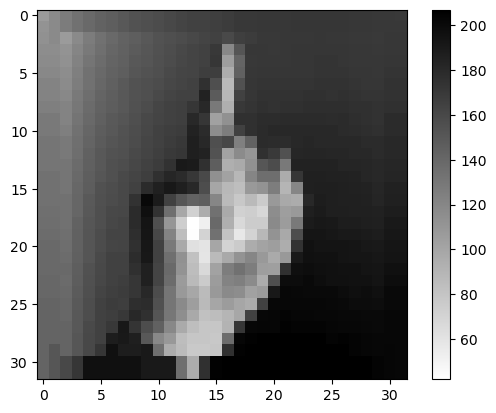

In [13]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [14]:
train_images = train_images / 255
test_images = test_images / 255

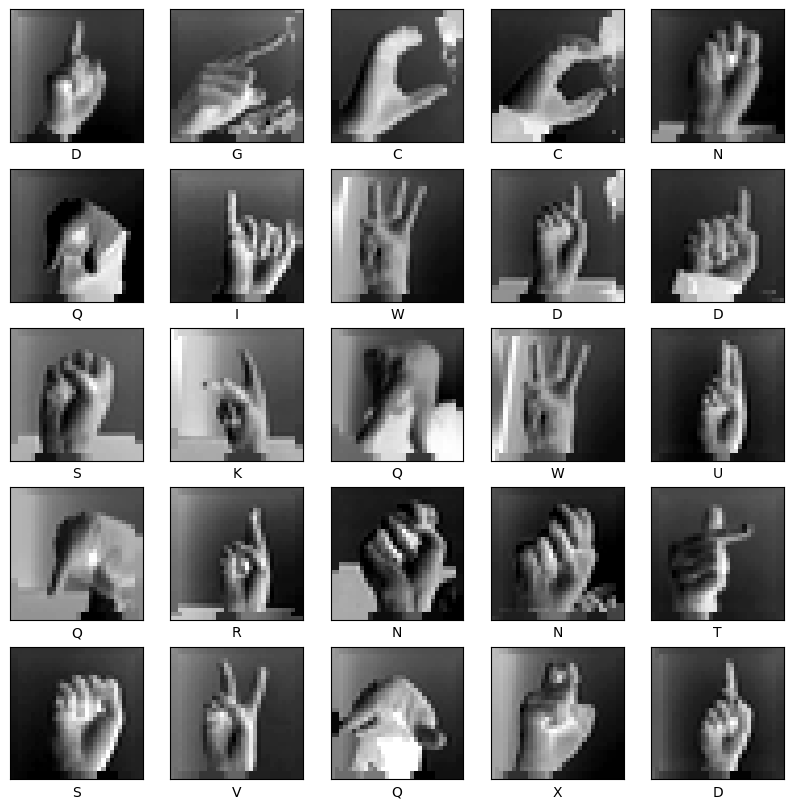

In [15]:
#Visualise image

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
#Data splitting

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.3, random_state = 101)

In [17]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

X_train.shape

(19218, 32, 32, 1)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [19]:
# Some key parameters
n_train = 300 #not needed
n_valid = 100 #not needed
# Define the number and size of hidden layers
hiddensizes = [16, 32, 16] # We can consider this parameter in CNN or DNN
# Define the activation function to be used by hidden layers
#actfn = "relu"
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01   # SGD default value
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 50

In [20]:
# Build a CNN
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same",
                                  input_shape=[32, 32, 1]))    # input layer goes into this 2D convolution
    model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    model.add(keras.layers.Dense(24, activation = "softmax"))  # always have 24 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [21]:
# Build a simple DNN (using dense layers)
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [32, 32, 1]))    # always have same sized inputs
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(24, activation = "softmax"))   # always have 24 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [22]:
#benchmark DNN

def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [23]:
# We can add an early stopping function
# Early stopping callback - this is executed when fitting and will stop and restore best result
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def exp_schedule(epoch):
    stretch=5
    return 0.0000001 * (10**-(epoch/stretch))
# Run with piecewise_const learning rate scheduler

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exp_schedule)


valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
model.summary()

Epoch 1/50
601/601 [==============================] - 1s 909us/step - loss: 3.1260 - accuracy: 0.0618 - val_loss: 3.0208 - val_accuracy: 0.0960
Epoch 2/50
601/601 [==============================] - 0s 732us/step - loss: 2.8776 - accuracy: 0.1158 - val_loss: 2.6886 - val_accuracy: 0.1594
Epoch 3/50
601/601 [==============================] - 0s 721us/step - loss: 2.5963 - accuracy: 0.1758 - val_loss: 2.8495 - val_accuracy: 0.1163
Epoch 4/50
601/601 [==============================] - 0s 722us/step - loss: 2.3175 - accuracy: 0.2344 - val_loss: 2.1208 - val_accuracy: 0.2752
Epoch 5/50
601/601 [==============================] - 0s 724us/step - loss: 2.0744 - accuracy: 0.3066 - val_loss: 2.0926 - val_accuracy: 0.3013
Epoch 6/50
601/601 [==============================] - 0s 721us/step - loss: 1.8766 - accuracy: 0.3757 - val_loss: 1.7136 - val_accuracy: 0.4061
Epoch 7/50
601/601 [==============================] - 0s 723us/step - loss: 1.6947 - accuracy: 0.4316 - val_loss: 1.6770 - val_accuracy:

Trainable params: 17880 (69.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show()

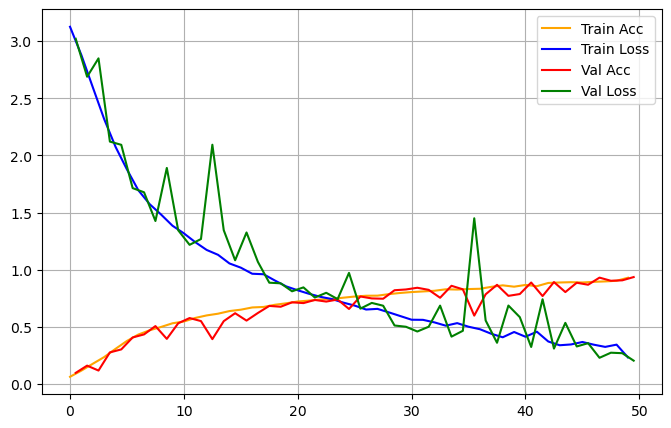

In [25]:
plot_history(history)

In [26]:
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[], verbose = 0):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val, y_val), verbose = verbose)
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

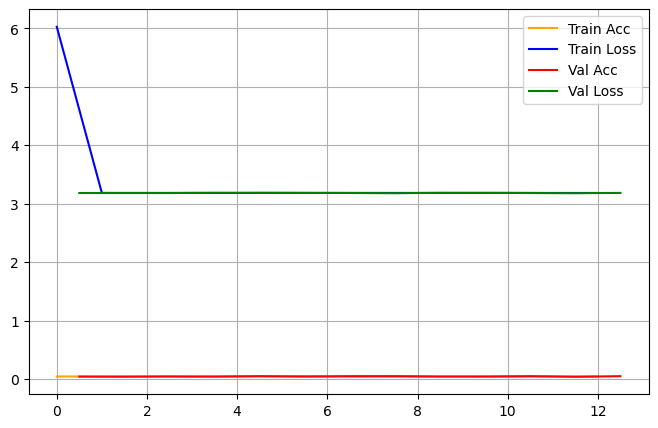

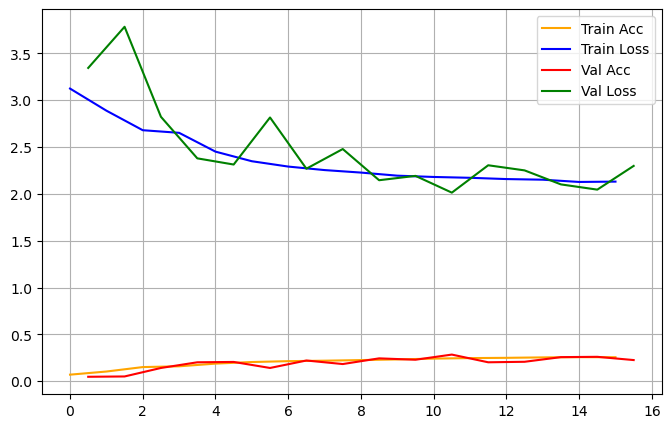

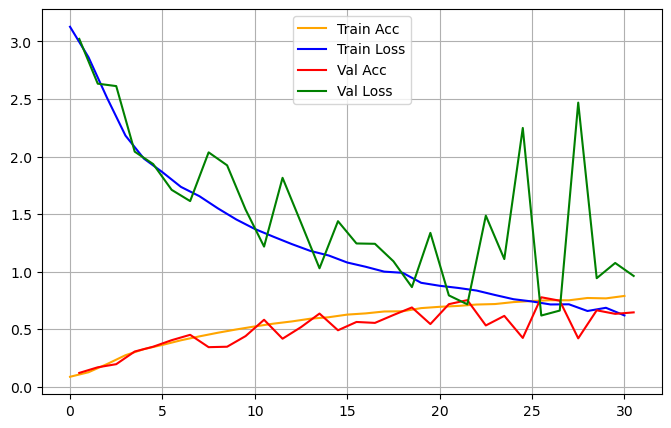

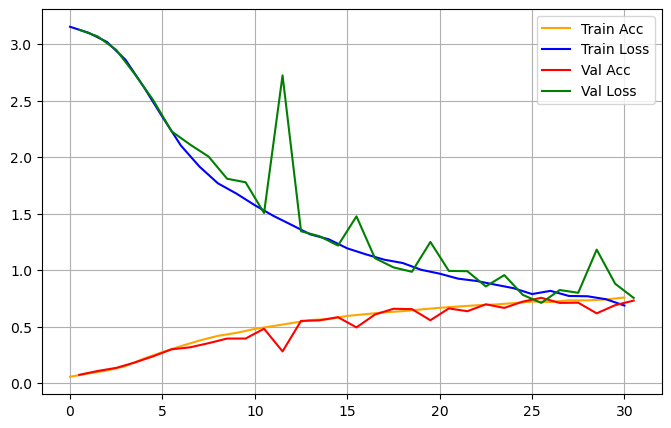

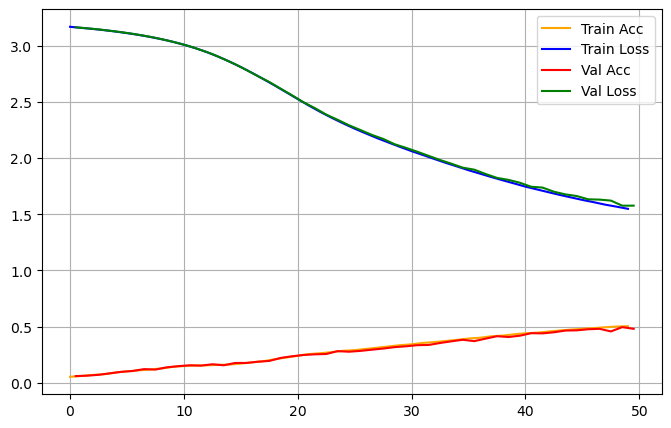

[[1, 0.04880417510867119], [0.1, 0.2844482362270355], [0.01, 0.7779531478881836], [0.005, 0.7554935216903687], [0.001, 0.4943547546863556]]


In [27]:
# Learning rate
res=[]
for lr in [1,0.1, 0.01, 0.005, 0.001]:
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[lr,valacc]]
print(res)



Text(0, 0.5, 'Val Accuracy')

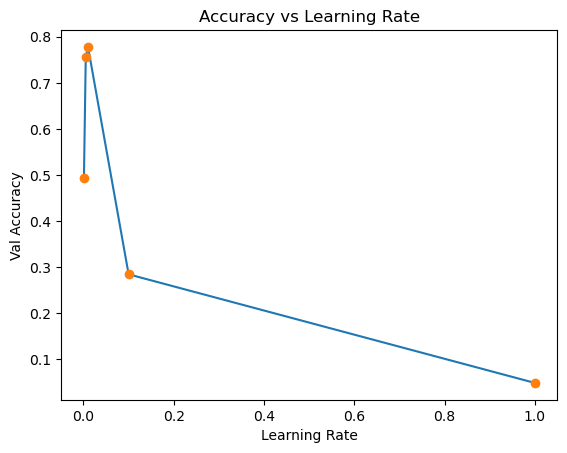

In [28]:
# The provided code is effective in visualising the relationship between
# learning rates and validation accuracy. It combines a line plot and scatter
# plot to show both trends and individual data points clearly. This visualisation
# helps in understanding how different learning rates impact the model's
# performance, facilitating better hyperparameter tuning.

res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

In [29]:
#update best learning rate which is 0.005 because although 0.01 provides slightly higher accuracy, 0.005 learning rate
#has less oscillation

learningrate = 0.005

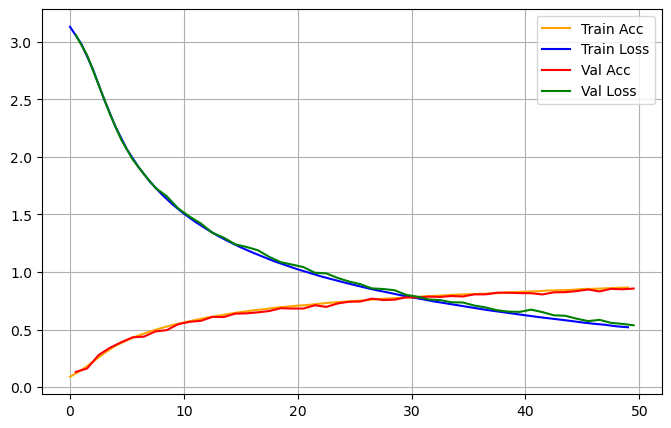

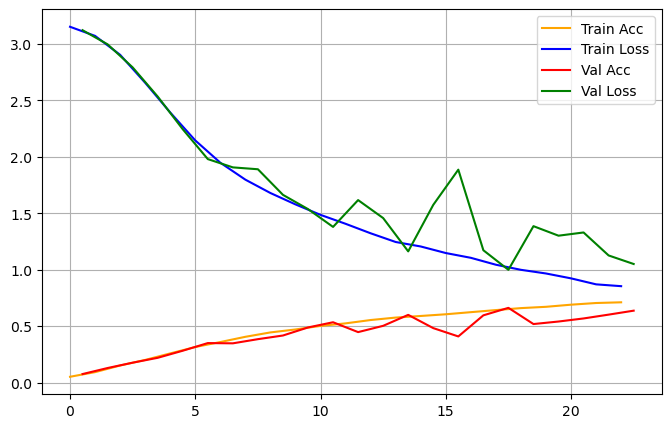

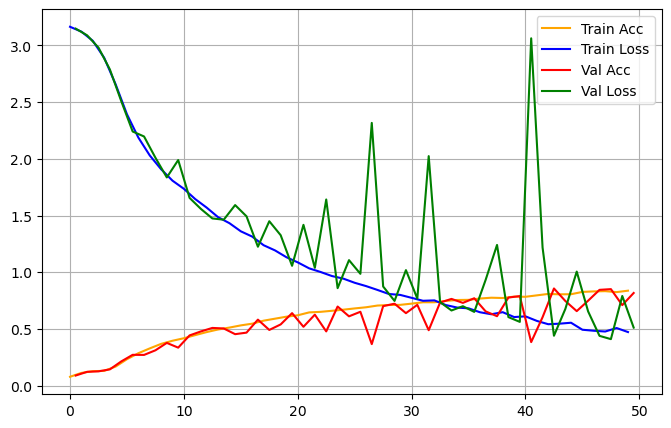

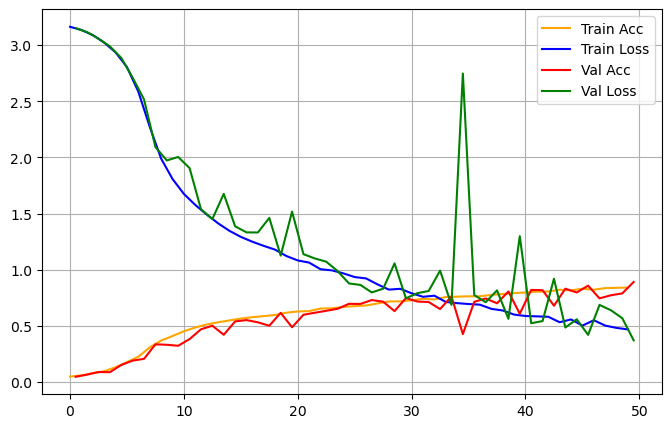

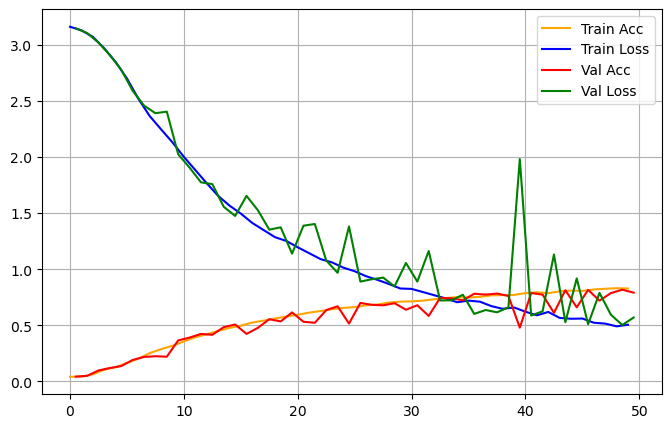

[[1, 0.8565011620521545], [3, 0.6631054878234863], [5, 0.8569867610931396], [7, 0.8907369375228882], [12, 0.8180162906646729]]


In [30]:
# The provided code is a robust way to evaluate the effect of different
# numbers of hidden layers on model performance, specifically the validation
# accuracy. By plotting the training history and storing the results,
# it allows for a clear comparison of how each configuration impacts the
# training process and final performance.

# Number of layers
res=[]
for n in [1, 3, 5, 7, 12]:
    valacc, history, discard = do_all(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[n,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

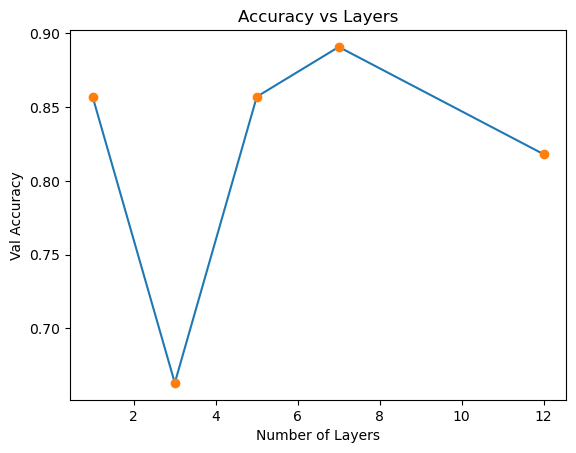

In [31]:
# The provided code is effective in visualising the relationship between the
# number of hidden layers and validation accuracy. It combines a line plot
# and scatter plot to show both trends and individual data points clearly.
# This visualization helps in understanding how different numbers of hidden
# layers impact the model's performance, facilitating better architecture decisions.

res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Val Accuracy')

In [32]:
#best layer at 7

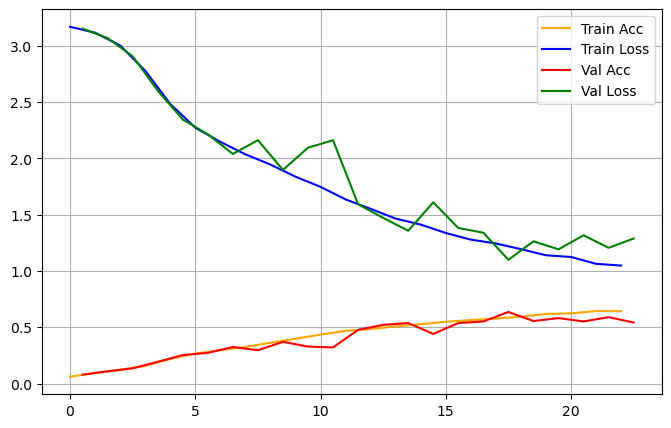

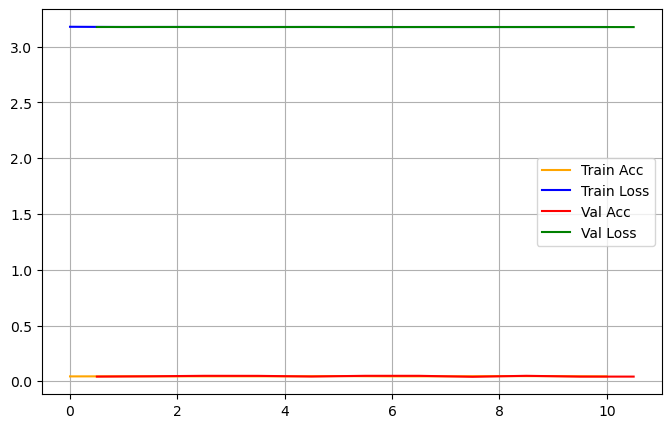

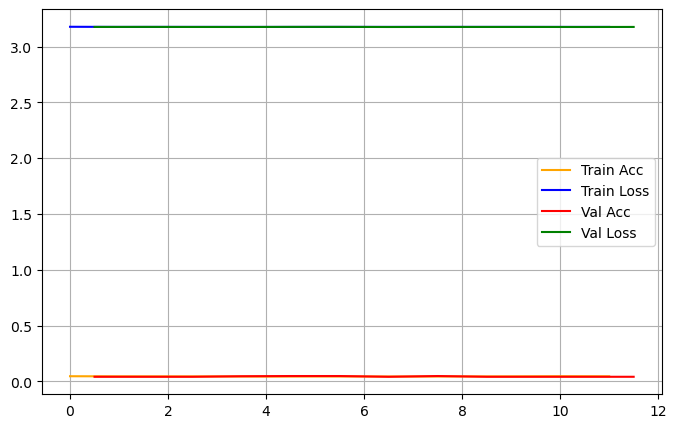

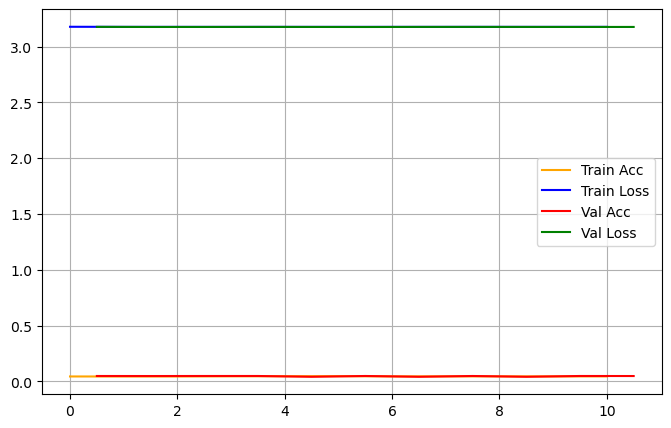

In [33]:
# The provided code is a robust way to evaluate the effect of different
# optimisers on model performance, specifically the validation accuracy.
# By plotting the training history and storing the results, it allows for a
# clear comparison of how each optimizer impacts the training process and
# final performance.

res=[]
optimizer_setup = [[keras.optimizers.SGD,0.005], [keras.optimizers.Adam,0.005],[keras.optimizers.RMSprop, 0.005], [keras.optimizers.Nadam, 0.005]]
for optimizer,lr in optimizer_setup :
    valacc, history, discard = do_all(hiddensizes[:7], actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]

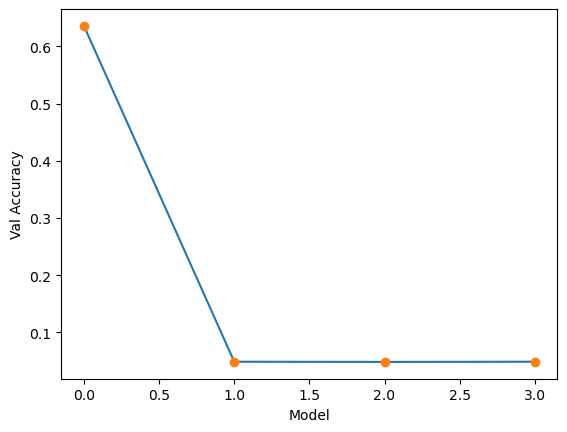

In [34]:
res=np.array(res)
plt.plot(res)
plt.plot(res,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

Based on the training above, the DNN runs best at 0.05 learning rate with 7 layes using SGD optimizer

In [35]:
# redefine baseline parameter for cnn
n_train = 300 #not needed
n_valid = 100 #not needed
# Define the number and size of hidden layers
hiddensizes = [16, 32, 16] # We can consider this parameter in CNN or DNN
# Define the activation function to be used by hidden layers
#actfn = "relu"
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01   # SGD default value
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 50

In [36]:
def do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [37]:
# We can add an early stopping function
early_stopping_cb2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# Run with piecewise_const learning rate scheduler

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exp_schedule)


valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
model.summary()

Epoch 1/50
601/601 [==============================] - 5s 9ms/step - loss: 3.1690 - accuracy: 0.0555 - val_loss: 3.1555 - val_accuracy: 0.0682
Epoch 2/50
601/601 [==============================] - 5s 8ms/step - loss: 3.0787 - accuracy: 0.1254 - val_loss: 2.8544 - val_accuracy: 0.1240
Epoch 3/50
601/601 [==============================] - 5s 8ms/step - loss: 2.0269 - accuracy: 0.3808 - val_loss: 1.5355 - val_accuracy: 0.5212
Epoch 4/50
601/601 [==============================] - 5s 8ms/step - loss: 1.0449 - accuracy: 0.6762 - val_loss: 0.8287 - val_accuracy: 0.7454
Epoch 5/50
601/601 [==============================] - 5s 8ms/step - loss: 0.5671 - accuracy: 0.8200 - val_loss: 0.4422 - val_accuracy: 0.8563
Epoch 6/50
601/601 [==============================] - 5s 8ms/step - loss: 0.3145 - accuracy: 0.8997 - val_loss: 0.2426 - val_accuracy: 0.9227
Epoch 7/50
601/601 [==============================] - 5s 8ms/step - loss: 0.1750 - accuracy: 0.9487 - val_loss: 0.1798 - val_accuracy: 0.9435
Epoch 

 flatten_15 (Flatten)        (None, 1024)              0         
                                                                 
 dense_58 (Dense)            (None, 24)                24600     
                                                                 
Total params: 34024 (132.91 KB)
Trainable params: 34024 (132.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show()

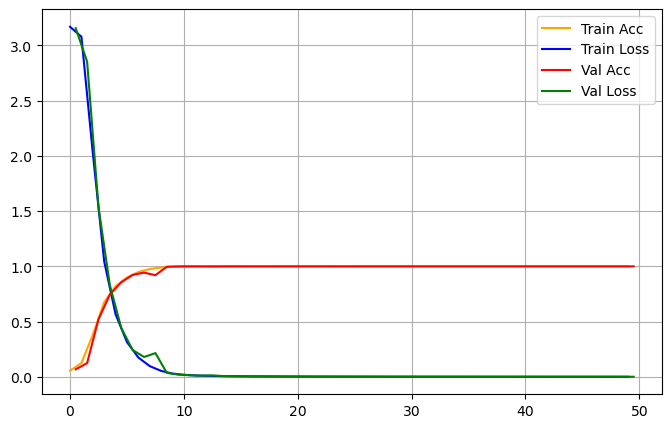

In [39]:
plot_history(history)

In [40]:
def do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[], verbose = 0):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val, y_val), verbose = verbose)
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

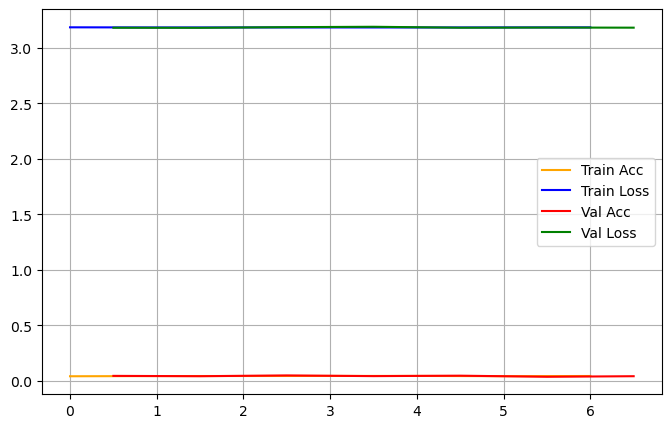

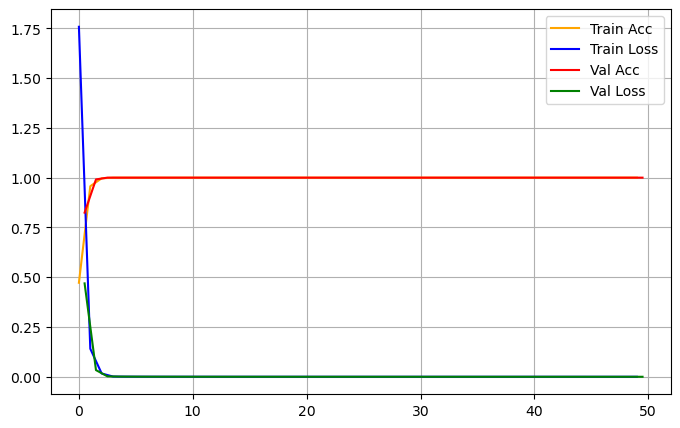

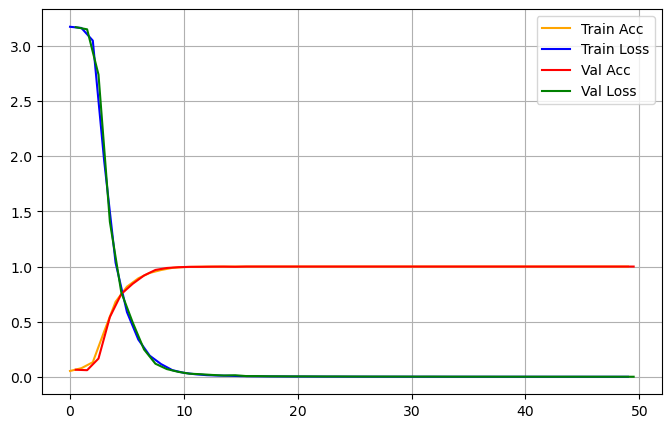

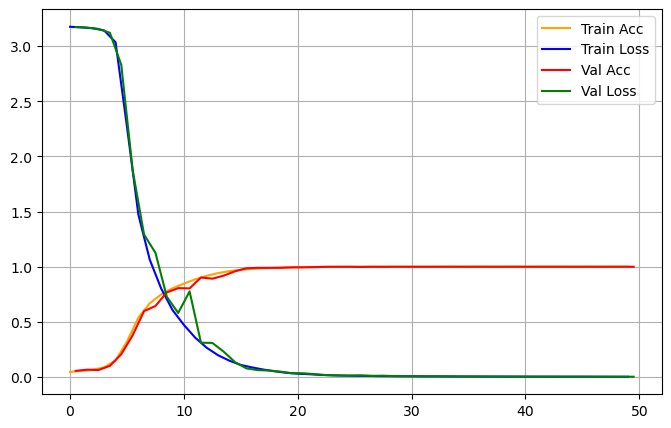

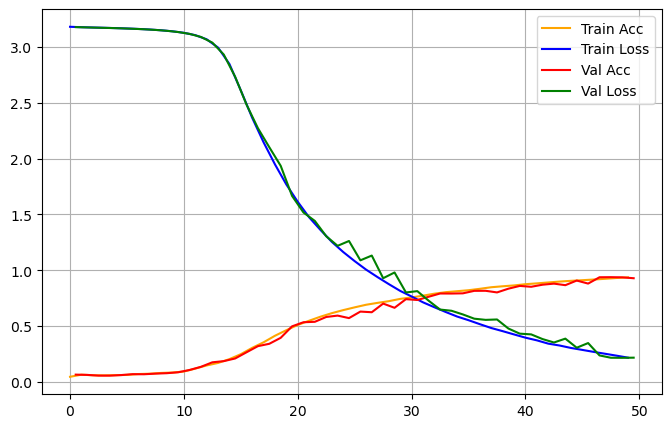

[[1, 0.04880417510867119], [0.1, 1.0], [0.01, 1.0], [0.005, 1.0], [0.001, 0.9390555024147034]]


In [41]:
# Learning rate
res=[]
for lr in [1,0.1, 0.01,0.005,0.001]:
    valacc, history, discard = do_cnn(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[lr,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

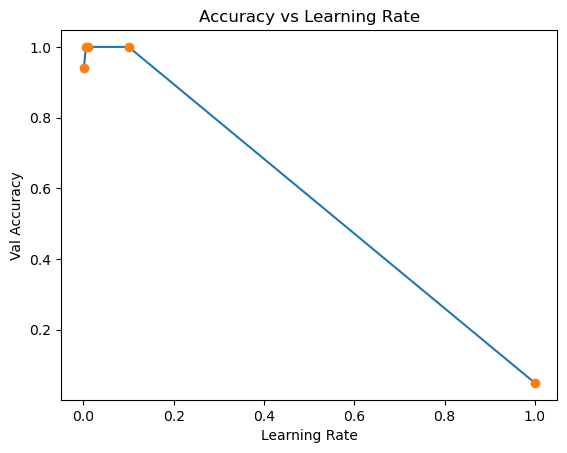

In [42]:
# The provided code is effective in visualising the relationship between
# learning rates and validation accuracy. It combines a line plot and scatter
# plot to show both trends and individual data points clearly. This visualisation
# helps in understanding how different learning rates impact the model's
# performance, facilitating better hyperparameter tuning.

res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

In [43]:
#update best learning rate which is 0.005

learningrate = 0.005

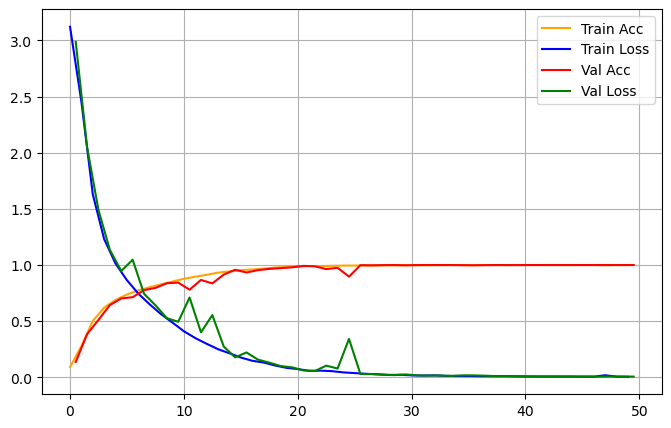

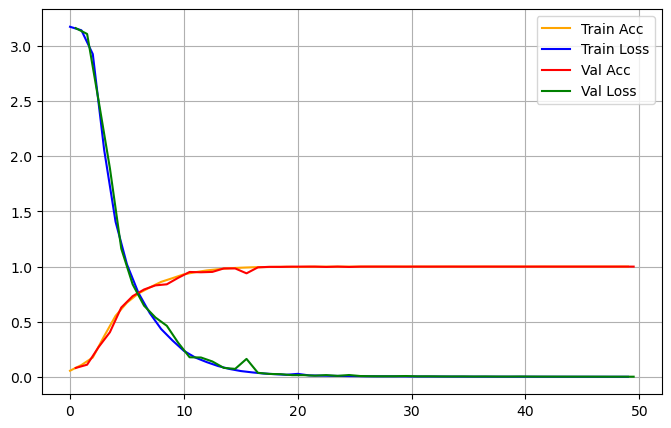

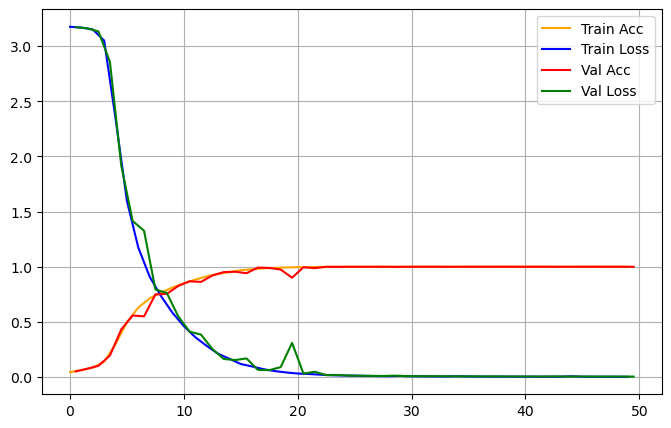

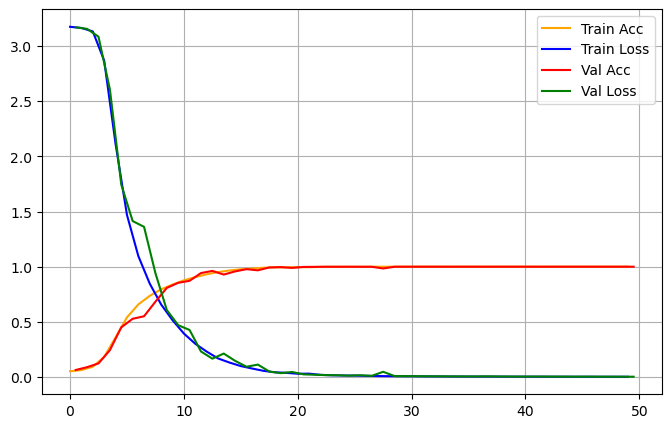

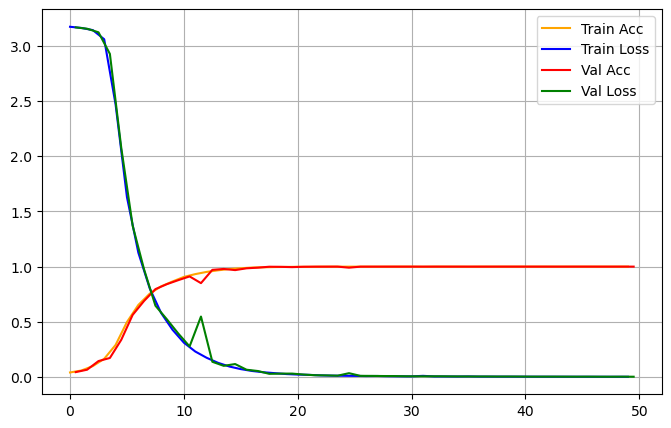

[[1, 1.0], [3, 0.9998785853385925], [5, 0.9997571706771851], [7, 1.0], [12, 1.0]]


In [44]:
# The provided code is a robust way to evaluate the effect of different
# numbers of hidden layers on model performance, specifically the validation
# accuracy. By plotting the training history and storing the results,
# it allows for a clear comparison of how each configuration impacts the
# training process and final performance.

# Number of layers
res=[]
for n in [1, 3, 5, 7, 12]:
    valacc, history, discard = do_cnn(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[n,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

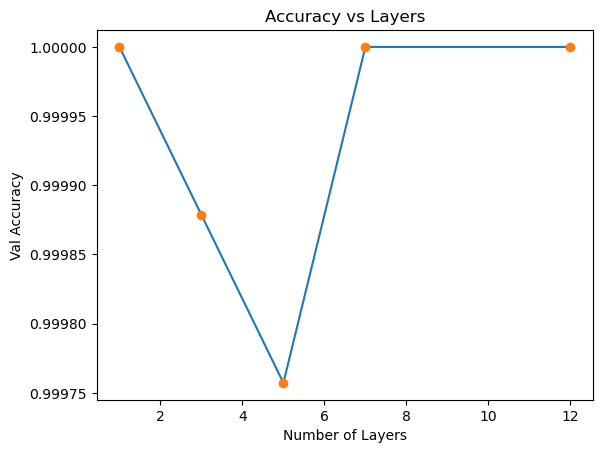

In [45]:
# The provided code is effective in visualising the relationship between the
# number of hidden layers and validation accuracy. It combines a line plot
# and scatter plot to show both trends and individual data points clearly.
# This visualization helps in understanding how different numbers of hidden
# layers impact the model's performance, facilitating better architecture decisions.

res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Val Accuracy')

In [46]:
#best layer is also 7

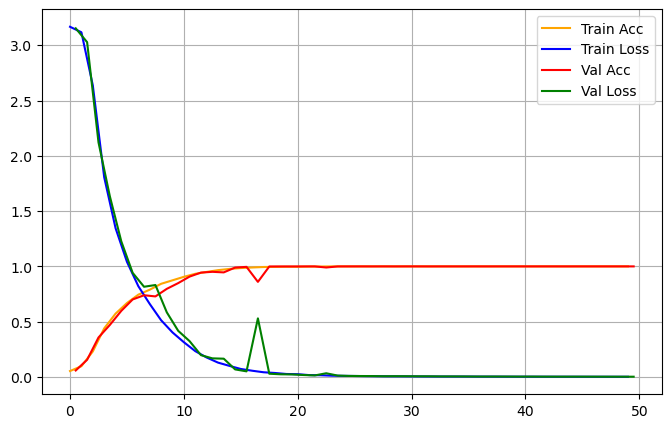

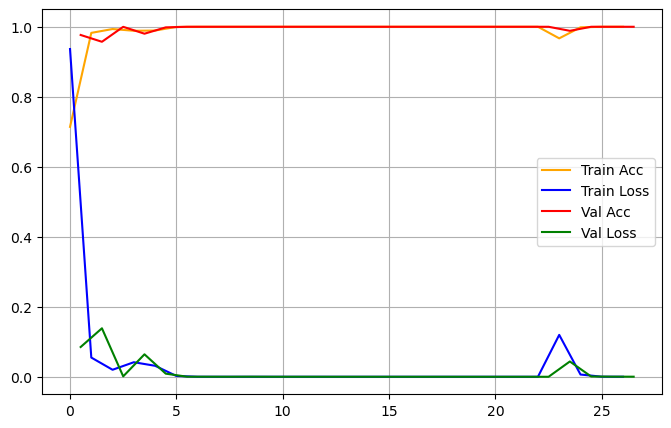

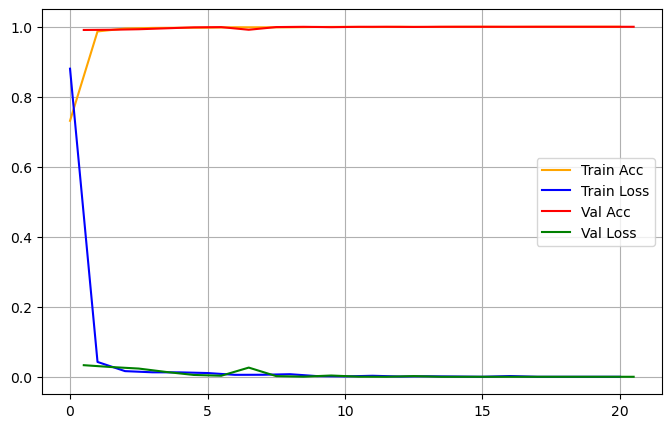

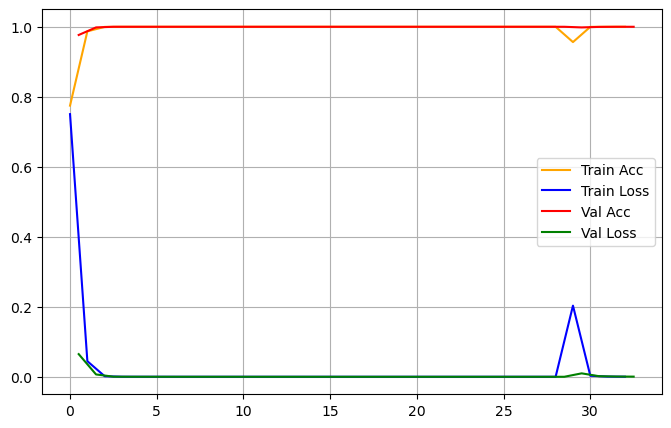

In [47]:
# The provided code is a robust way to evaluate the effect of different
# optimisers on model performance, specifically the validation accuracy.
# By plotting the training history and storing the results, it allows for a
# clear comparison of how each optimizer impacts the training process and
# final performance.

res=[]
optimizer_setup = [[keras.optimizers.SGD,0.005], [keras.optimizers.Adam,0.005],[keras.optimizers.RMSprop, 0.005], [keras.optimizers.Nadam, 0.005]]
for optimizer,lr in optimizer_setup :
    valacc, history, discard = do_cnn(hiddensizes[:7], actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]

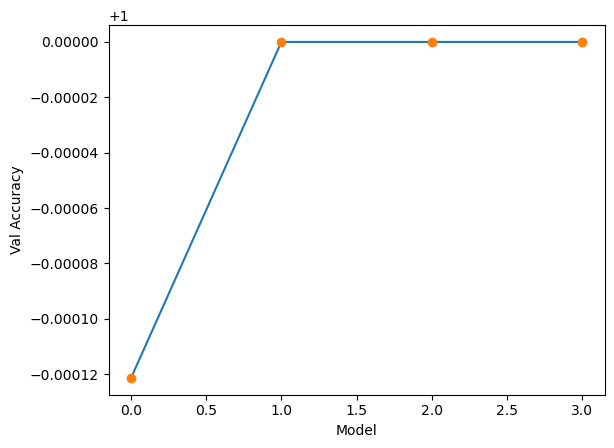

In [48]:
res=np.array(res)
plt.plot(res)
plt.plot(res,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

In [49]:
#SGD is the worst optimizer as it was the slowest for the accuracy to reach the peak. 
#RMSprop looks to reach the peak validation accuracy the fastest

In [50]:
# Some key parameters for DNN
n_train = 300
n_valid = 100
# Define the number and size of hidden layers
hiddensizes = [16, 32, 16] # We can consider this parameter in CNN or DNN
# Define the activation function to be used by hidden layers
#actfn = "relu"
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.005   # SGD default value
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 50

In [51]:
# DNN final fit
early_stopping_cb2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# Run with piecewise_const learning rate scheduler

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exp_schedule)


valaccd, historyd, modeld = do_all(hiddensizes[:7], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, [early_stopping_cb2])
modeld.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 1024)              0         
                                                                 
 dense_73 (Dense)            (None, 16)                16400     
                                                                 
 dense_74 (Dense)            (None, 32)                544       
                                                                 
 dense_75 (Dense)            (None, 16)                528       
                                                                 
 dense_76 (Dense)            (None, 24)                408       
                                                                 
Total params: 17880 (69.84 KB)
Trainable params: 17880 (69.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
#DNN has 17880 parameters

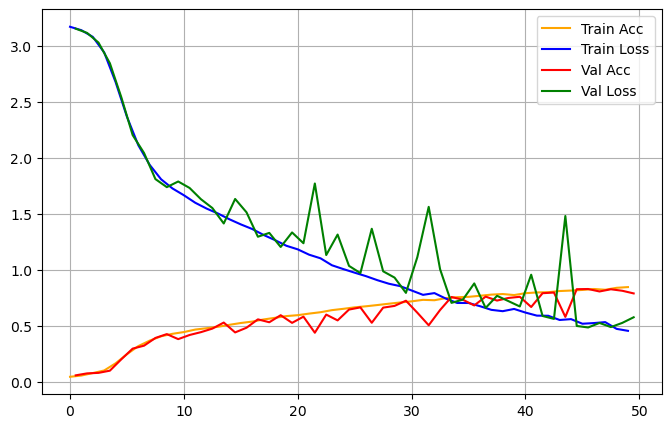

In [53]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(historyd.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show()
    
plot_history(historyd) #0.005

In [54]:
# Some key parameters for CNN
n_train = 300
n_valid = 100
# Define the number and size of hidden layers
hiddensizes = [16, 32, 16] # We can consider this parameter in CNN or DNN
# Define the activation function to be used by hidden layers
#actfn = "relu"
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.RMSprop
learningrate = 0.005   # SGD default value
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 50

In [55]:
# We can add an early stopping function
early_stopping_cb2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# Run with piecewise_const learning rate scheduler

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exp_schedule)


valaccc, historyc, modelc = do_cnn(hiddensizes[:7], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, [early_stopping_cb2])
modelc.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 8, 8, 16)          4624      
                                                                 
 flatten_31 (Flatten)        (None, 1024)            

In [56]:
#CNN has 34024 parameters

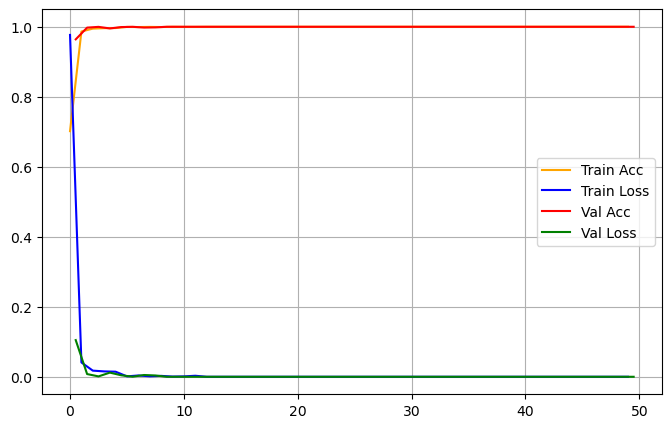

In [57]:
plot_history(historyc) #0.005

In [58]:
def plot_accuracy(historyd, historyc):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(historyd.history['accuracy'])
    plt.plot(np.arange(0,n),historyd.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),historyc.history['accuracy'],'b')
    plt.plot(np.arange(0,n)+0.5,historyd.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,historyc.history['val_accuracy'],'g')
    plt.legend(['Train Acc DNN','Train Acc CNN','Val Acc DNN','Val Acc CNN'])
    plt.grid(True)
    plt.show()

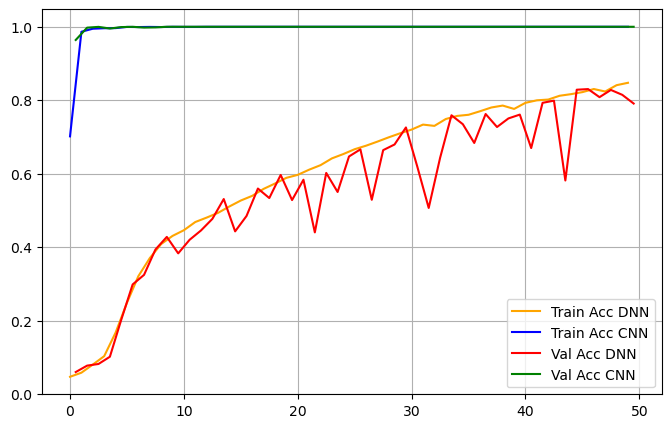

In [59]:
plot_accuracy(historyd, historyc)

Based on the validation accuracy, CNN outperforms the DNN. Thus the CNN model is used for the final evaluation. However, DNN
model is also evaluated to show how the performance of DNN compares with the performance of CNN based on the client's criteria.

In [60]:
X_test = test_images
y_test = test_labels

225/225 [==============================] - 0s 460us/step
Accuracy for letter 'A': 48.64%
Accuracy for letter 'B': 63.66%
Accuracy for letter 'C': 86.77%
Accuracy for letter 'D': 91.84%
Accuracy for letter 'E': 67.67%
Accuracy for letter 'F': 69.64%
Accuracy for letter 'G': 61.78%
Accuracy for letter 'H': 60.32%
Accuracy for letter 'I': 3.82%
Accuracy for letter 'J': 22.36%
Accuracy for letter 'K': 96.65%
Accuracy for letter 'L': 20.30%
Accuracy for letter 'M': 59.11%
Accuracy for letter 'N': 67.48%
Accuracy for letter 'O': 85.30%
Accuracy for letter 'P': 74.39%
Accuracy for letter 'Q': 32.64%
Accuracy for letter 'R': 24.39%
Accuracy for letter 'S': 37.90%
Accuracy for letter 'T': 39.10%
Accuracy for letter 'U': 30.06%
Accuracy for letter 'V': 21.84%
Accuracy for letter 'W': 56.55%
Accuracy for letter 'X': 57.23%


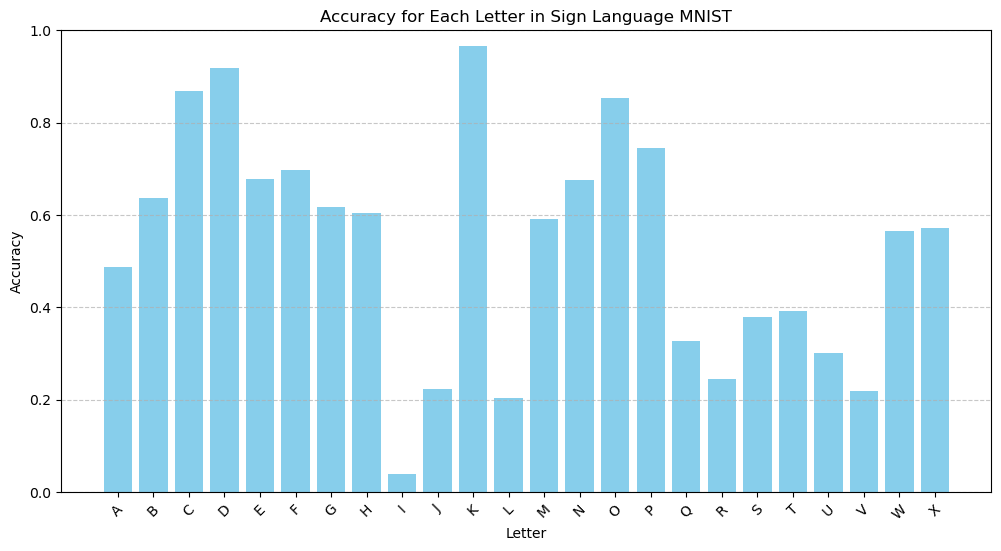

In [61]:
#DNN evaluation (accuracy)

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `X_test` and `y_test` are your test dataset features and labels

# 1. Calculate predictions and overall median accuracy
y_pred = modeld.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
overall_accuracy = accuracy_score(y_test, y_pred_classes)

# 2. Calculate accuracy per letter (class)
class_accuracies = []
for i in range(24):  # Assuming 24 classes for A-Z (excluding J and Z)
    class_acc = accuracy_score(y_test[y_test == i], y_pred_classes[y_test == i])
    class_accuracies.append(class_acc)

median_accuracy = np.median(class_accuracies)
highest_accuracy = max(class_accuracies)
lowest_accuracy = min(class_accuracies)
highest_accuracy_letter = chr(65 + np.argmax(class_accuracies))  # Convert to letter
lowest_accuracy_letter = chr(65 + np.argmin(class_accuracies))  # Convert to letter

# Assuming class_accuracies is already calculated as above

letters = [chr(65 + i) for i in range(24)]  # Letters A-Z (excluding J and Z)
for letter, acc in zip(letters, class_accuracies):
    print(f"Accuracy for letter '{letter}': {acc:.2%}")
    

# Plotting the accuracy for each letter
plt.figure(figsize=(12, 6))
plt.bar(letters, class_accuracies, color='skyblue')
plt.xlabel('Letter')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Letter in Sign Language MNIST')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()




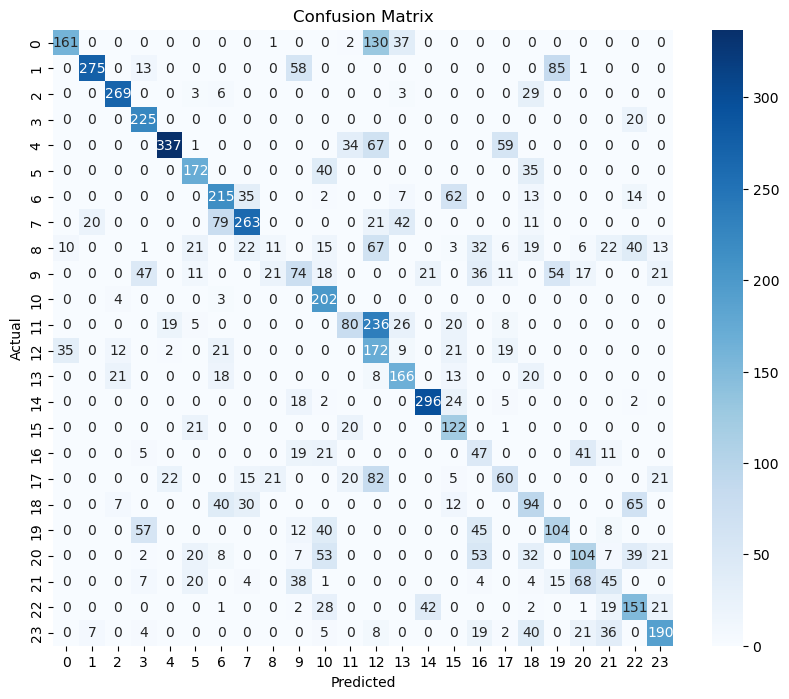

1. 236 times: 'L' misclassified as 'M'
2. 130 times: 'A' misclassified as 'M'
3. 85 times: 'B' misclassified as 'T'

Client Report:
Unbiased Median Accuracy: 58.17%
Letter with the Highest Individual Accuracy: 'K' (96.65%)
Letter with the Lowest Individual Accuracy: 'I' (3.82%)
Three Most Common Single Types of Errors:
   1. 236 times: 'L' misclassified as 'M'
   2. 130 times: 'A' misclassified as 'M'
   3. 85 times: 'B' misclassified as 'T'


In [62]:
#DNN Evaluation cont. (confusion matrix, etc.)
# 3. Confusion matrix to find common errors
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Finding the three most common errors
flat_conf_matrix = conf_matrix.flatten()
sorted_conf_matrix = np.argsort(flat_conf_matrix)[::-1]  # Sort in descending order
most_common_errors = [(divmod(i, conf_matrix.shape[0]), flat_conf_matrix[i]) for i in sorted_conf_matrix if divmod(i, conf_matrix.shape[0])[0] != divmod(i, conf_matrix.shape[0])[1]]

# Display the top three errors
for idx, (error_pair, count) in enumerate(most_common_errors[:3], 1):
    actual_letter = chr(65 + error_pair[0])
    predicted_letter = chr(65 + error_pair[1])
    print(f"{idx}. {count} times: '{actual_letter}' misclassified as '{predicted_letter}'")

# 4. Report the results
print("\nClient Report:")
print(f"Unbiased Median Accuracy: {median_accuracy:.2%}")
print(f"Letter with the Highest Individual Accuracy: '{highest_accuracy_letter}' ({highest_accuracy:.2%})")
print(f"Letter with the Lowest Individual Accuracy: '{lowest_accuracy_letter}' ({lowest_accuracy:.2%})")
print("Three Most Common Single Types of Errors:")
for idx, (error_pair, count) in enumerate(most_common_errors[:3], 1):
    actual_letter = chr(65 + error_pair[0])
    predicted_letter = chr(65 + error_pair[1])
    print(f"   {idx}. {count} times: '{actual_letter}' misclassified as '{predicted_letter}'")


225/225 [==============================] - 1s 3ms/step
Accuracy for letter 'A': 100.00%
Accuracy for letter 'B': 98.15%
Accuracy for letter 'C': 93.23%
Accuracy for letter 'D': 95.10%
Accuracy for letter 'E': 100.00%
Accuracy for letter 'F': 100.00%
Accuracy for letter 'G': 92.24%
Accuracy for letter 'H': 87.39%
Accuracy for letter 'I': 92.71%
Accuracy for letter 'J': 84.59%
Accuracy for letter 'K': 100.00%
Accuracy for letter 'L': 93.65%
Accuracy for letter 'M': 75.26%
Accuracy for letter 'N': 97.97%
Accuracy for letter 'O': 99.42%
Accuracy for letter 'P': 96.95%
Accuracy for letter 'Q': 100.00%
Accuracy for letter 'R': 100.00%
Accuracy for letter 'S': 66.94%
Accuracy for letter 'T': 81.20%
Accuracy for letter 'U': 93.93%
Accuracy for letter 'V': 100.00%
Accuracy for letter 'W': 92.13%
Accuracy for letter 'X': 88.25%


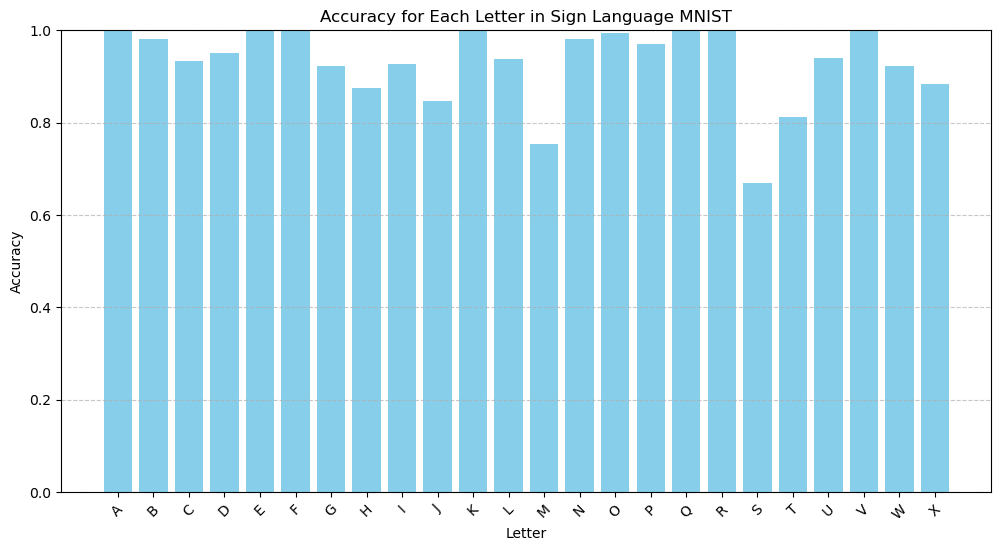

In [63]:
#CNN evaluation (accuracy)

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `X_test` and `y_test` are your test dataset features and labels

# 1. Calculate predictions and overall median accuracy
y_pred = modelc.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
overall_accuracy = accuracy_score(y_test, y_pred_classes)

# 2. Calculate accuracy per letter (class)
class_accuracies = []
for i in range(24):  # Assuming 24 classes for A-Z (excluding J and Z)
    class_acc = accuracy_score(y_test[y_test == i], y_pred_classes[y_test == i])
    class_accuracies.append(class_acc)

median_accuracy = np.median(class_accuracies)
highest_accuracy = max(class_accuracies)
lowest_accuracy = min(class_accuracies)
highest_accuracy_letter = chr(65 + np.argmax(class_accuracies))  # Convert to letter
lowest_accuracy_letter = chr(65 + np.argmin(class_accuracies))  # Convert to letter

# Assuming class_accuracies is already calculated as above

letters = [chr(65 + i) for i in range(24)]  # Letters A-Z (excluding J and Z)
for letter, acc in zip(letters, class_accuracies):
    print(f"Accuracy for letter '{letter}': {acc:.2%}")
    

# Plotting the accuracy for each letter
plt.figure(figsize=(12, 6))
plt.bar(letters, class_accuracies, color='skyblue')
plt.xlabel('Letter')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Letter in Sign Language MNIST')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


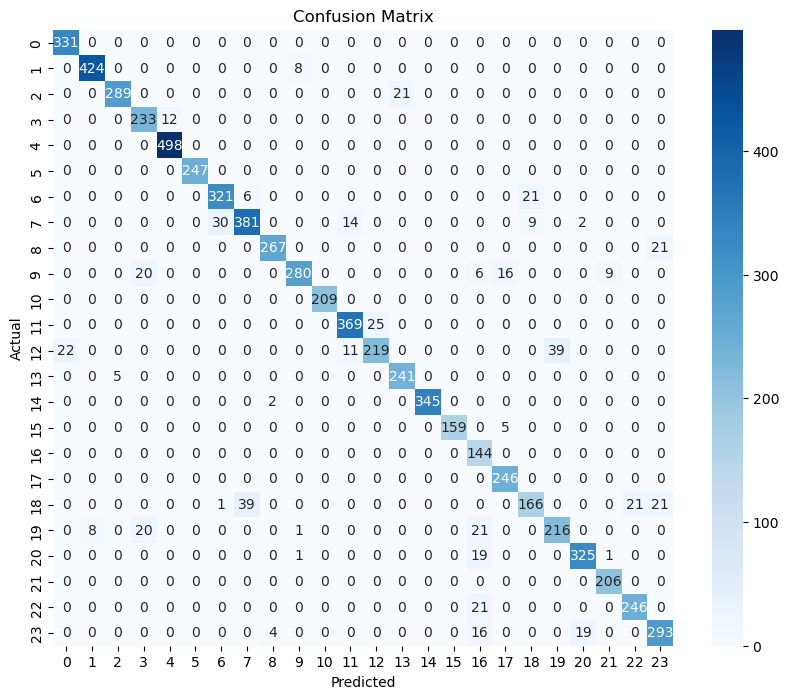

1. 39 times: 'S' misclassified as 'H'
2. 39 times: 'M' misclassified as 'T'
3. 30 times: 'H' misclassified as 'G'

Client Report:
Unbiased Median Accuracy: 94.52%
Letter with the Highest Individual Accuracy: 'A' (100.00%)
Letter with the Lowest Individual Accuracy: 'S' (66.94%)
Three Most Common Single Types of Errors:
   1. 39 times: 'S' misclassified as 'H'
   2. 39 times: 'M' misclassified as 'T'
   3. 30 times: 'H' misclassified as 'G'


In [64]:
#CNN Evaluation cont. (confusion matrix, etc.)
# 3. Confusion matrix to find common errors
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Finding the three most common errors
flat_conf_matrix = conf_matrix.flatten()
sorted_conf_matrix = np.argsort(flat_conf_matrix)[::-1]  # Sort in descending order
most_common_errors = [(divmod(i, conf_matrix.shape[0]), flat_conf_matrix[i]) for i in sorted_conf_matrix if divmod(i, conf_matrix.shape[0])[0] != divmod(i, conf_matrix.shape[0])[1]]

# Display the top three errors
for idx, (error_pair, count) in enumerate(most_common_errors[:3], 1):
    actual_letter = chr(65 + error_pair[0])
    predicted_letter = chr(65 + error_pair[1])
    print(f"{idx}. {count} times: '{actual_letter}' misclassified as '{predicted_letter}'")

# 4. Report the results
print("\nClient Report:")
print(f"Unbiased Median Accuracy: {median_accuracy:.2%}")
print(f"Letter with the Highest Individual Accuracy: '{highest_accuracy_letter}' ({highest_accuracy:.2%})")
print(f"Letter with the Lowest Individual Accuracy: '{lowest_accuracy_letter}' ({lowest_accuracy:.2%})")
print("Three Most Common Single Types of Errors:")
for idx, (error_pair, count) in enumerate(most_common_errors[:3], 1):
    actual_letter = chr(65 + error_pair[0])
    predicted_letter = chr(65 + error_pair[1])
    print(f"   {idx}. {count} times: '{actual_letter}' misclassified as '{predicted_letter}'")


The current model's unbiased median accuracy of 94.52% indicates that while the model performs well and it meets of the desired 94% overall accuracy. However, the lowest individual letter accuracy is 66.94%, which is significantly below the target of 85% for every letter. While the model shows strong performance on certain letters (e.g., 'A' with 100% accuracy and 'E' with 98% accuracy), it struggles with others, particularly 'S' and letters 'M' and 'H' that are frequently misclassified. To achieve the goals, further model optimization is necessary. Which may involve refining the model architecture, data augmentation, or increasing the dataset on low accuracy letters.


Reference:
code for CNN and DNN and hyperparameter training are used from workshop 11